In [36]:
# Imports
import matplotlib.pyplot as plt
import maze_dataset as md
import maze_generator.maze_dataset as md
import numpy as np
import DQN.training as trainer
import DQN.agent as agent
import DQN.models as models
import os
print(os.getcwd())

/home/cody/Documents/DataSciBC/Generative_AI/maze_game


In [37]:
dataset = md.Maze_dataset(1,(3,3),maze_type = 'percolation')

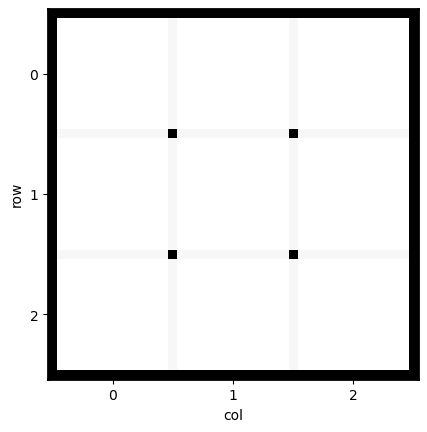

In [38]:
dataset.show_maze(0)

In [39]:
init_pos = {'agents': [0],
            'targets': [8]
                        }
# --- maze agent with the type of model --- #
maze_agent = agent.maze_agents(models.CNN_version1,
                               vision=3,
                               action_type='cardinal')
# --- trainer of the agent --- #
train = trainer.Maze_Training(name = 'test11',
                              maze_dataset = dataset,
                              maze_agent = maze_agent,
                              len_game=100,
                              n_agents=1,
                              gamma = 0.99,
                              tau = 0.005,
                              batch_size = 64,
                              n_frames = 500000,
                              lr = 0.000025,
                              replay_buffer_size=100000,
                              target_update=10000,
                              policy_update=1,
                              lambda_entropy=0,
                              beta = 0.8,
                              alpha = 0.6
                              )
train.train()
train.save()

/home/cody/miniconda3/envs/GameRFL/lib/python3.12/site-packages/gymnasium/utils/passive_env_checker.py:245: UserWarning: WARN: The reward returned by `step()` must be a float, int, np.integer or np.floating, actual type: <class 'numpy.ndarray'>
  logger.warn(


frame 10000 with loss 42.4839973449707
frame 20000 with loss 9.399179458618164
frame 30000 with loss 4.241947174072266
frame 40000 with loss 3.8430299758911133
frame 50000 with loss 3.8071656227111816
frame 60000 with loss 4.679348468780518
frame 70000 with loss 5.993048191070557
frame 80000 with loss 5.724233627319336
frame 90000 with loss 7.068887233734131
frame 100000 with loss 4.9318132400512695
frame 110000 with loss 7.993264198303223
frame 120000 with loss 5.728002071380615
frame 130000 with loss 4.191904067993164
frame 140000 with loss 7.773235321044922
frame 150000 with loss 8.303268432617188
frame 160000 with loss 6.731847763061523
frame 170000 with loss 6.6464619636535645
frame 180000 with loss 8.431868553161621
frame 190000 with loss 7.566557884216309
frame 200000 with loss 6.826785564422607
frame 210000 with loss 7.551023483276367
frame 220000 with loss 6.953381538391113
frame 230000 with loss 7.889780521392822
frame 240000 with loss 8.722217559814453
frame 250000 with loss

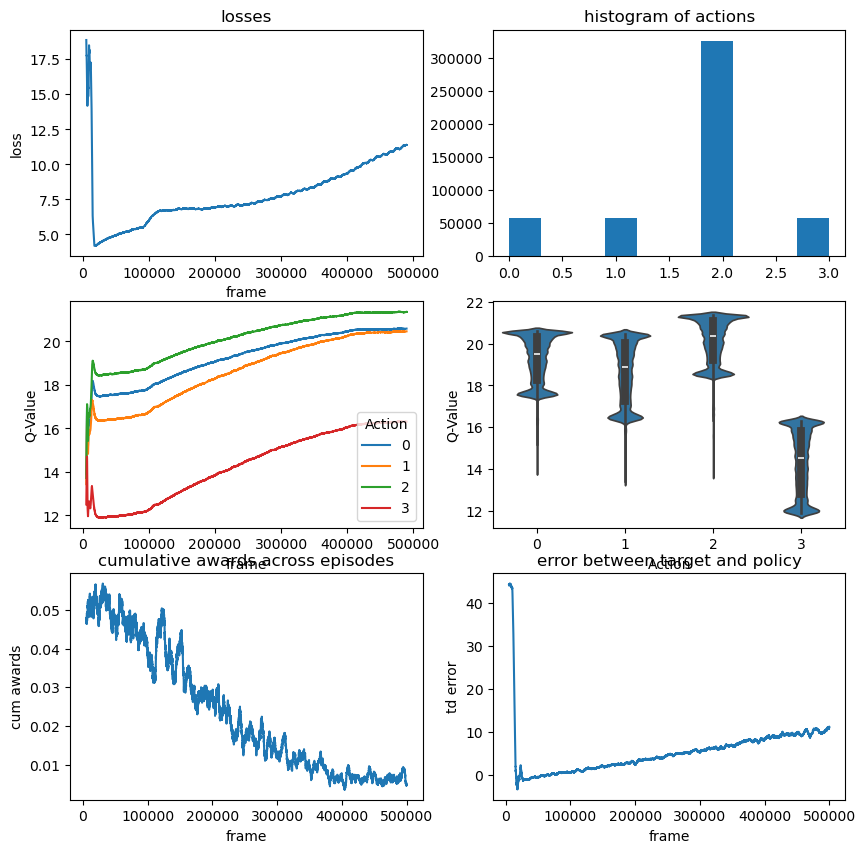

In [40]:
train.results()

In [45]:
init_pos = {'agents': [0],
            'targets': [8]
                        }
train.agents.run_agent(dataset.__getitem__(0),num_agents=1,len_game=50,epsilon=0,sample_prob=False)


cumulative reward: [0]


In [42]:
import DQN.agent as agent

load = agent.maze_agents.load('test6')

/home/cody/Documents/DataSciBC/Generative_AI/maze_game/DQN/agent.py:77: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  param_load = torch.load(os.path.join(fd, f'agent.pth'))

In [43]:
init_pos = {'agents': [0],
            'targets': [8]
                        }
testing_dataset = md.Maze_dataset(1,shape=(3,3),maze_type='percolation')

In [44]:
load.run_agent(testing_dataset[0],len_game=100,init_pos=init_pos)

TypeError: maze_agents.run_agent() got an unexpected keyword argument 'init_pos'